In [1]:
from openai import OpenAI
import re
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import json
import matplotlib
from dotenv import load_dotenv

load_dotenv()

client = OpenAI()

# 1. CSV with a structure prompt

In [2]:
datagen_model = "gpt-4o-mini"
question = """
Create a CSV file with 1- rows of housing data.
Each row should include the following fields:
- id (incrementing integer starting from 1)
- house size (m^2)
- house price
- location
- number of bedrooms

Make sure that the numbers make sense (i.e. more rooms is usually bigger size, more expensive locations increase price. more size is usually higher price etc. make sure all the numbers make sense). Also only respond with the CSV.
"""

response = client.chat.completions.create(
    model=datagen_model,
    messages=[
        {"role": "system", "content": "You are a helpful assistant designed to generate synthetic data."},
        {"role": "user", "content": question}
    ]
)
res = response.choices[0].message.content
print(res)

```csv
id,house_size_m2,house_price,location,number_of_bedrooms
1,50,150000,Suburb A,2
2,75,250000,Suburb B,3
3,100,350000,City Center,3
4,120,450000,City Center,4
5,60,200000,Suburb A,2
6,80,300000,Suburb C,3
7,150,600000,City Center,5
8,200,800000,Premium Area,5
9,40,120000,Suburb D,1
10,90,320000,Suburb B,4
11,110,400000,Suburb C,4
12,130,500000,Premium Area,4
13,55,175000,Suburb D,2
14,65,220000,Suburb A,3
15,140,550000,City Center,5
16,180,700000,Premium Area,6
17,95,310000,Suburb C,3
18,85,295000,Suburb B,3
19,130,480000,City Center,5
20,170,650000,Premium Area,6
```


# 2. CSV with a Python program

In [3]:
question = """
Create a Python program to generate 10 rows of housing data.
I want you to at the end of it output a pandas dataframe with 10 rows of data.
Each row should include the following fields:
- id (incrementing integer starting at 1)
 - house size (m^2)
 - house price
 - location
 - number of bedrooms

Make sure that the numbers make sense (i.e. more rooms is usually bigger size, more expensive locations increase price. more size is usually higher price etc. make sure all the numbers make sense).
"""

response = client.chat.completions.create(
    model=datagen_model,
    messages=[
        {"role": "system", "content": "You are a helpful assistant designed to generate synthetic data."},
        {"role": "user", "content": question}
    ]
)
res = response.choices[0].message.content
print(res)

Certainly! Below is a Python program that generates a synthetic dataset of housing data according to your specifications. The dataset consists of 10 rows and includes the specified fields while ensuring that the values make sense in terms of housing characteristics.

```python
import pandas as pd
import numpy as np

# Function to generate housing data
def generate_housing_data(num_rows=10):
    data = []
    np.random.seed(0)  # Setting a seed for reproducibility

    # Define some parameters for the data generation
    locations = ['City Center', 'Suburbs', 'Countryside']
    base_price_per_m2 = {'City Center': 5000, 'Suburbs': 3000, 'Countryside': 2000}
    sizes = np.random.randint(50, 300, size=num_rows)  # Sizes between 50 m^2 and 300 m^2

    for i in range(num_rows):
        # Randomly select location for each house
        location = np.random.choice(locations)
        
        # Define the number of bedrooms based on house size
        if sizes[i] < 80:
            bedrooms = 

# 3. MultiTable CSV with a python program

In [4]:
question = """
Create a Python program to generate 3 different pandas dataframes.

1. Housing data
I want 10 rows. Each row should include the following fields:
 - id (incrementing integer starting at 1)
 - house size (m^2)
 - house price
 - location
 - number of bedrooms
 - house type
 + any relevant foreign keys

2. Location
Each row should include the following fields:
 - id (incrementing integer starting at 1)
 - country
 - city
 - population
 - area (m^2)
 + any relevant foreign keys

 3. House types
 - id (incrementing integer starting at 1)
 - house type
 - average house type price
 - number of houses
 + any relevant foreign keys

Make sure that the numbers make sense (i.e. more rooms is usually bigger size, more expensive locations increase price. more size is usually higher price etc. make sure all the numbers make sense).
Make sure that the dataframe generally follow common sense checks, e.g. the size of the dataframes make sense in comparison with one another.
Make sure the foreign keys match up and you can use previously generated dataframes when creating each consecutive dataframes.
You can use the previously generated dataframe to generate the next dataframe.
"""

response = client.chat.completions.create(
    model=datagen_model,
    messages=[
        {"role": "system", "content": "You are heplful assistant designed to generate synthetic data."},
        {"role":"user", "content": question}
    ]
)
res = response.choices[0].message.content
print(res)

Here's a Python program that generates three different pandas DataFrames: Housing Data, Location Data, and House Types Data. Each DataFrame adheres to the specifications provided and maintains logical relationships among them.

```python
import pandas as pd
import numpy as np
import random

# Setting a random seed for reproducibility
random.seed(0)
np.random.seed(0)

# Generate Location Data
locations = {
    'id': range(1, 6),
    'country': ['USA', 'Canada', 'UK', 'Germany', 'Australia'],
    'city': ['New York', 'Toronto', 'London', 'Berlin', 'Sydney'],
    'population': [8419600, 2930000, 8982000, 3769000, 5312000],
    'area_m2': [789.43, 630.21, 1572.13, 891.85, 1234.34]
}

location_df = pd.DataFrame(locations)

# Generate House Types Data
house_types = {
    'id': range(1, 5),
    'house_type': ['Apartment', 'Detached', 'Semi-Detached', 'Townhouse'],
    'average_house_type_price': [300000, 500000, 400000, 350000],
    'number_of_houses': [20000, 15000, 10000, 12000]
}

house_ty

# 4. Creating textual data

In [5]:
output_string = ""
for i in range(3):
    question = f"""
    I am creating input output training pairs to fine tune my gpt model. \
    Create 5 example input output pairs for the following usecase: \
    The usecase is a retailer generating a description for a product from a product catalogue. \
    I want the input to be product name and category (to which the product belongs to) and output to be description.\
    1.
    Input: product_name, category
    Output: description
    2.
    Input: product_name, category
    Output: description

    Do not add any extra characters around that formatting as it will make the output parsing break.
    """
    response = client.chat.completions.create(
        model=datagen_model,
        messages=[
            {"role": "system", "content": "You are a helpful assistant designed to generate synthetic data."},
            {"role": "user", "content": question}
        ]
    )
    res = response.choices[0].message.content
    output_string += res + "\n" + "\n"
print(output_string[:1000])

1.  
Input: Wireless Bluetooth Headphones, Electronics  
Output: Experience superior sound quality and comfort with our Wireless Bluetooth Headphones, designed for music lovers and on-the-go professionals alike. With a long-lasting battery life and noise-canceling technology, these headphones deliver an immersive audio experience, whether you're at home or commuting.  

2.  
Input: Stainless Steel Chef's Knife, Kitchenware  
Output: Elevate your culinary skills with our Stainless Steel Chef's Knife, crafted for precision and durability. Its ergonomic handle provides a comfortable grip, while the high-quality blade ensures effortless slicing, chopping, and dicing of any ingredient. Perfect for both home cooks and professional chefs.  

3.  
Input: Eco-Friendly Yoga Mat, Fitness  
Output: Enhance your yoga practice with our Eco-Friendly Yoga Mat, made from natural materials that are free from harmful chemicals. This mat provides excellent grip and cushioning for optimal support during yo

In [6]:
#regex to parse data
pattern = re.compile(r'Input:\s*(.+?),\s*(.+?)\nOutput:\s*(.+?)(?=\n\n|\Z)', re.DOTALL)
matches = pattern.findall(output_string)
products = []
categories = []
descriptions = []

for match in matches:
    product, category, description = match
    products.append(product.strip())
    categories.append(category.strip())
    descriptions.append(description.strip())
products

['Wireless Bluetooth Headphones',
 "Stainless Steel Chef's Knife",
 'Eco-Friendly Yoga Mat',
 '4K Ultra HD Smart TV',
 'Multi-Purpose Blender',
 'Wireless Noise Cancelling Headphones',
 'Organic Green Tea',
 'Eco-Friendly Yoga Mat',
 '4K Ultra HD Smart TV',
 'Stainless Steel Water Bottle',
 'Wireless Bluetooth Headphones',
 'Organic Green Tea Bags',
 'Yoga Mat',
 'Stainless Steel Water Bottle',
 'LED Desk Lamp']

# 5. Dealing with imbalanced or non-diverse textual data

In [7]:
output_string = ""
for i in range(3):
  question = f"""
  I am creating input output training pairs to fine tune my gpt model. \
  I want the input to be product name and category and output to be description. \
  The category should be things like: mobile phones, shoes, headphones, laptop, electronic toothbrush, \
  etc. and also more importantly the categories should come under 4 main topics: vehicle, clothing, toiletries, food)\
  Create 5 examples for each topic.\
  After the number of each example also state the topic area. The format should be of the form: \
  1. topic_area\
  Input: product_name, category\
  Output: description\

  Do not add any extra characters around that formatting as it will make the output parsing break. \

  Here are some helpful examples so you get the style of output correct. \

  1) clothing \
  Input: "Shoe Name, Shoes" \
  Output: "Experience unparalleled comfort. These shoes feature a blend of modern style and the traditional superior cushioning, perfect for those always on the move." \
  """

  response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
      {"role": "system", "content": "You are a helpful assistant designed to generate synthetic data."},
      {"role": "user", "content": question}
    ]
  )
  res = response.choices[0].message.content
  output_string += res + "\n" + "\n"
print(output_string[:1000]) #displaying truncated response

1. vehicle   Input: "Sedan X100, Vehicle"   Output: "The Sedan X100 combines sophisticated design with advanced technology, making it an ideal choice for both city and highway driving. Enjoy the smooth ride and innovative features that ensure safety and comfort."

2. vehicle   Input: "Mountain Bike Pro, Bicycle"   Output: "Conquer any terrain with the Mountain Bike Pro. Equipped with high-performance gears and sturdy tires, this bike is designed for the adventurous rider who craves thrill and speed on rugged trails."

3. vehicle   Input: "Electric Scooter Z, Scooter"   Output: "The Electric Scooter Z is your eco-friendly transportation solution, featuring a sleek design and a powerful battery that allows for up to 25 miles of travel on a single charge. Perfect for commuting or leisurely rides around town."

4. vehicle   Input: "Pickup Truck Max, Vehicle"   Output: "The Pickup Truck Max is built for strength and utility, featuring a spacious bed for hauling, advanced safety features, an

In [8]:
pattern = re.compile(r'(\d+)\.\s*(\w+)\s*Input:\s*"(.+?),\s*(.+?)"\s*Output:\s*"(.*?)"', re.DOTALL)
matches = pattern.findall(output_string)

topics = []
products = []
categories = []
descriptions = []

for match in matches:
    number, topic, product, category, description = match
    topics.append(topic)
    products.append(product)
    categories.append(category)
    descriptions.append(description)
products

['Sedan X100',
 'Mountain Bike Pro',
 'Electric Scooter Z',
 'Pickup Truck Max',
 'Luxury SUV Limo',
 'Shoe Name',
 'Designer Jacket',
 'Athletic Leggings',
 'Casual T-shirt',
 'Woolen Sweater',
 'Electric Toothbrush Pro',
 'Refreshing Face Wash',
 'Moisturizing Body Lotion',
 'Anti-Aging Serum',
 'Shaving Kit Essentials',
 'Gourmet Pasta',
 'Organic Almonds',
 'Artisanal Bread Loaf',
 'Premium Coffee Beans',
 'Spicy Salsa Dip',
 'Tesla Model 3',
 'Honda Accord',
 'Yamaha MT-07',
 'Toyota RAV4',
 'Ford F-150',
 'Nike Air Max',
 "Levi's 501",
 'North Face Hedgehog',
 'Adidas Ultraboost',
 'H&M Seasonal Dress',
 'Oral-B Genius',
 'Nivea Moisturizing Cream',
 'Head & Shoulders Classic Clean',
 'Gillette Fusion',
 'Secret Clinical Strength',
 'Nature Valley Crunchy Granola Bars',
 'Oreo Cookies',
 'Quaker Oats Instant',
 'Lays Classic Chips',
 'Coca-Cola Classic',
 'Tesla Model S',
 'Yamaha YZF-R3',
 'Ford F-150',
 'Toyota Corolla',
 'GMC Terrain',
 'Nike Air Max',
 "Levi's 501 Jeans",
 'A

In [9]:
data = {
    'Product': products,
    'Category': categories,
    'Description': descriptions
}

df = pd.DataFrame(data)

In [10]:
def get_embedding(text, model="text-embedding-3-small"):
    text = text.replace("\n", " ")

    response = client.embeddings.create(input=[text], model=model)

    return response.data[0].embedding

embedding_model = "text-embedding-3-small"
df["embedding"] = df.Category.apply(lambda x: get_embedding(x, model=embedding_model))

# Ensure there are embeddings to concatenate
if len(df.embedding.values) > 0:
    matrix = np.vstack(df.embedding.values)
else:
    matrix = np.array([])  # Handle the case where there are no embeddings

In [11]:
# Determine the optimal number of clusters using the elbow method
inertias = []
range_of_clusters = range(1, 13)  # Adjust the range as necessary

for n_clusters in range_of_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42, n_init=10)
    kmeans.fit(matrix)
    inertias.append(kmeans.inertia_)

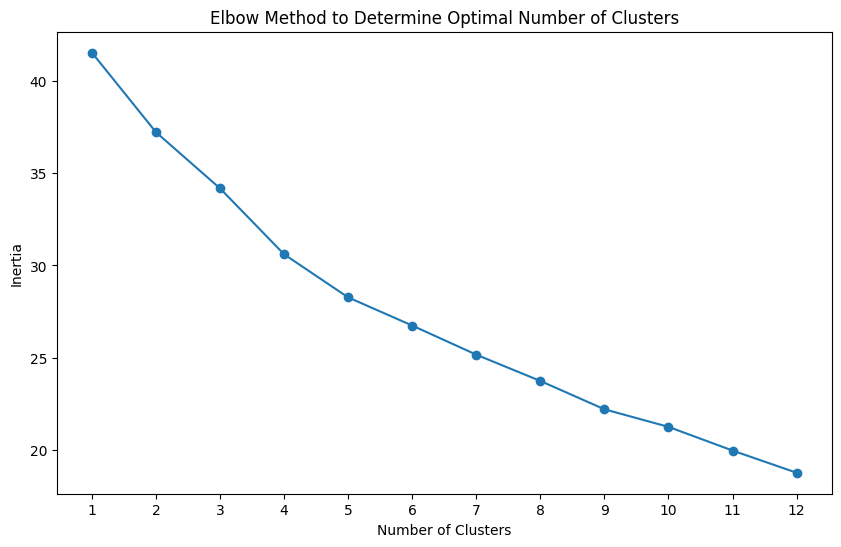

In [12]:
# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range_of_clusters, inertias, '-o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_of_clusters)
plt.show()